## Comparison of the Machine Learning models performances for diabetes patients

Mini-project to play with the classification methods: SVM, KNN and Random Forests. The goal is to understand the behavior of the classification methods and their applicability in different setups.

**Context:**
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Content:**
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.



**The dataset is composed of:**
- Pregnancies: Number of time pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Blood Pressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skinfold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function: Diabetes pedigree function
- Age: Age(years)
- Outcome: 0 or 1

### Import packages and data

In [3]:
import pandas as pd
import numpy as np
import math
from datetime import datetime
import time 

from sklearn.datasets import load_digits

import seaborn as sns

import matplotlib.pyplot as plt

import missingno as msno

import struct

from sklearn import metrics
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,make_scorer
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
%matplotlib inline
from sklearn.inspection import permutation_importance

In [4]:
df_diabetes = pd.read_csv('diabetes.csv')

In [5]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df_diabetes.shape

(768, 9)

In [7]:
df_diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As you can see above some of the variables (Glucose,BloodPressure,SkinThickness,Insulin,BMI) have 0 as minimum value - which is impossible.

Therefore we evaluate them as missing values and replace them by NaN and will later fill them by the median.

In [9]:
# Replacing 0 values by NaN
df_diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

<AxesSubplot:>

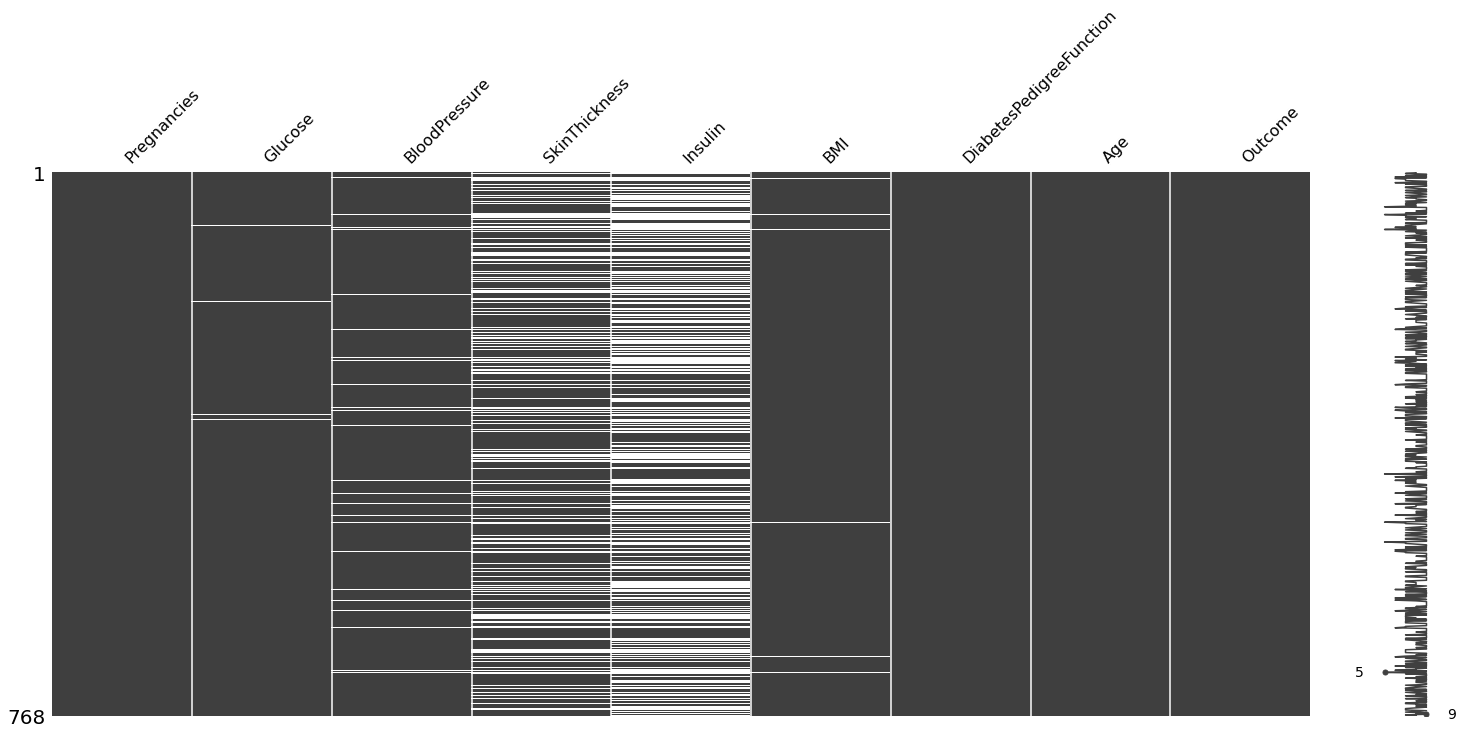

In [10]:
# Check for missing values
msno.matrix(df_diabetes)

In [11]:
# Filling NaN values 
df_diabetes['Glucose'].fillna(df_diabetes['Glucose'].median(), inplace = True)
df_diabetes['BloodPressure'].fillna(df_diabetes['BloodPressure'].median(), inplace = True)
df_diabetes['SkinThickness'].fillna(df_diabetes['SkinThickness'].median(), inplace = True)
df_diabetes['Insulin'].fillna(df_diabetes['Insulin'].median(), inplace = True)
df_diabetes['BMI'].fillna(df_diabetes['BMI'].mean(), inplace = True)

In [12]:
# Check the features
print("Features: ", df_diabetes.columns)

# check the target outcome
df_diabetes.groupby('Outcome').size()

Features:  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


Outcome
0    500
1    268
dtype: int64

#### Data visualization

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

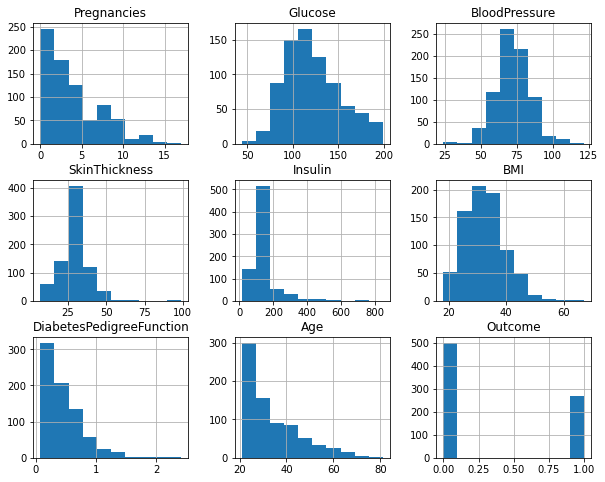

In [13]:
df_diabetes.hist(figsize=(10,8))

/Users/yuliianikolaenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yuliianikolaenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yuliianikolaenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figur

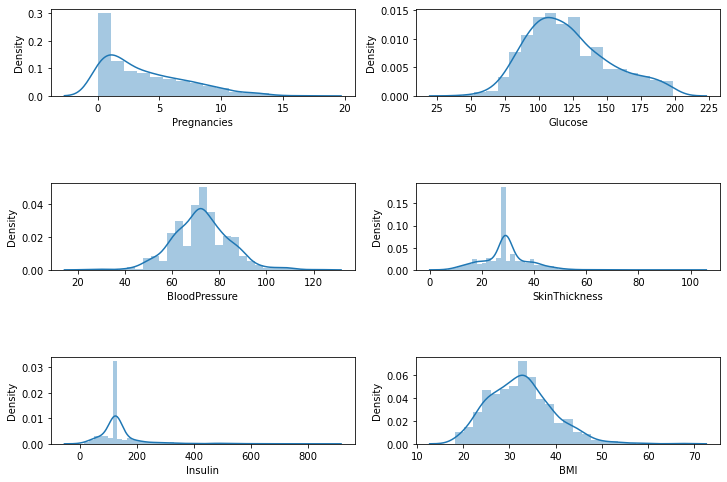

In [14]:
fig, axarr = plt.subplots(3, 2, figsize=(12, 8))

sns.distplot(df_diabetes['Pregnancies'],ax=axarr[0][0])
sns.distplot(df_diabetes['Glucose'],ax=axarr[0][1])
sns.distplot(df_diabetes['BloodPressure'],ax=axarr[1][0])
sns.distplot(df_diabetes['SkinThickness'],ax=axarr[1][1])
sns.distplot(df_diabetes['Insulin'],ax=axarr[2][0])
sns.distplot(df_diabetes['BMI'],ax=axarr[2][1])

plt.subplots_adjust(hspace=1)

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

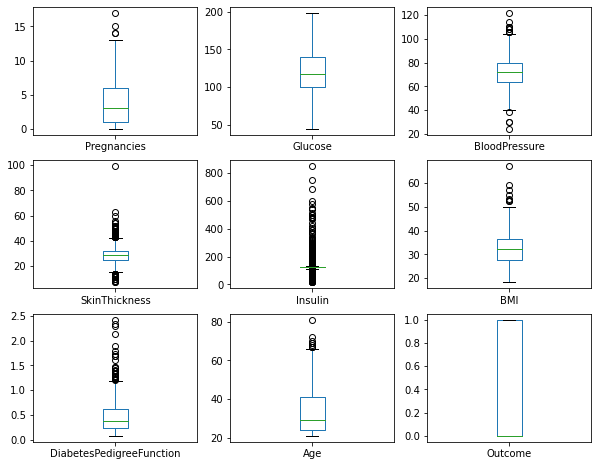

In [15]:
df_diabetes.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

/Users/yuliianikolaenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/yuliianikolaenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/yuliianikolaenko/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in a

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

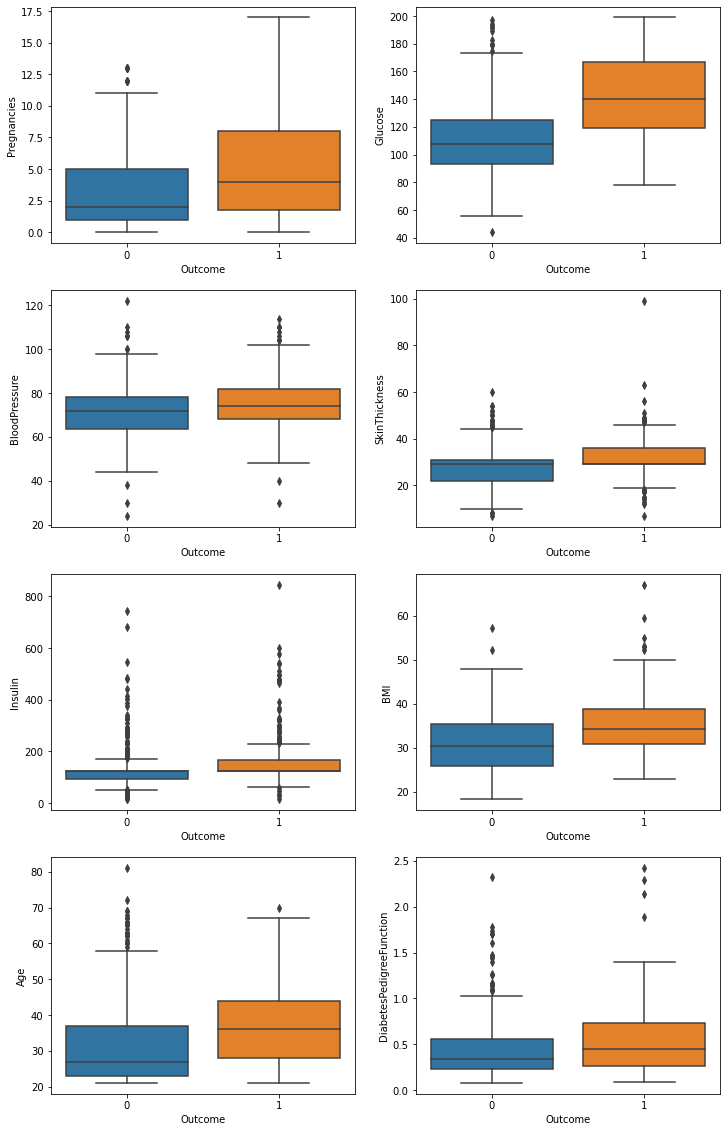

In [16]:
#Look for outliers in the df_diabetes
fig, axarr = plt.subplots(4, 2, figsize=(12, 20))
sns.boxplot(df_diabetes['Outcome'], df_diabetes['Pregnancies'],ax=axarr[0][0])
sns.boxplot(df_diabetes['Outcome'], df_diabetes['Glucose'],ax=axarr[0][1])
sns.boxplot(df_diabetes['Outcome'], df_diabetes['BloodPressure'],ax=axarr[1][0])
sns.boxplot(df_diabetes['Outcome'], df_diabetes['SkinThickness'],ax=axarr[1][1])
sns.boxplot(df_diabetes['Outcome'], df_diabetes['Insulin'],ax=axarr[2][0])
sns.boxplot(df_diabetes['Outcome'], df_diabetes['BMI'],ax=axarr[2][1])
sns.boxplot(df_diabetes['Outcome'], df_diabetes['Age'],ax=axarr[3][0])
sns.boxplot(df_diabetes['Outcome'], df_diabetes['DiabetesPedigreeFunction'],ax=axarr[3][1])

In [17]:
X = df_diabetes.drop(columns='Outcome',axis=1)
#X = df_diabetes[['Pregnancies','BMI','DiabetesPedigreeFunction']]
Y = df_diabetes['Outcome']

X_train_diabetes, X_test_diabetes, Y_train_diabetes, Y_test_diabetes = train_test_split(X,Y, test_size=0.2,random_state=42) # 80% training and 20% test

#Standard scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train_diabetes)
X_test = sc.transform(X_test_diabetes)

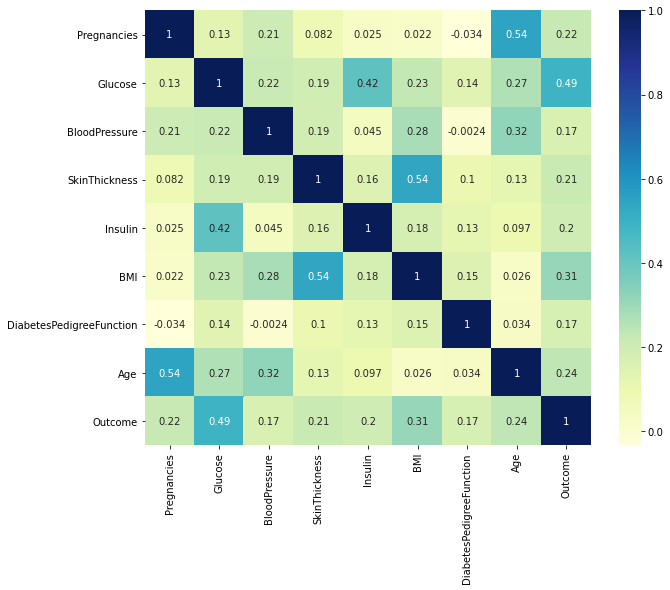

In [18]:
# Getting correlations of each features 
corrmat = df_diabetes.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (10,8))

g = sns.heatmap(df_diabetes[top_corr_features].corr(),annot = True,cmap = "YlGnBu")

### 1. SVM

In [19]:
svm_t_start = time.time() 

#Create a svm Classifier
svm_diabetes = svm.SVC(kernel='linear') # Linear Kernel

svm_diabetes.fit(X_train_diabetes, Y_train_diabetes)

y_pred_diabetes = svm_diabetes.predict(X_test_diabetes)

print(f'Training took (s): {time.time()-svm_t_start}')

Training took (s): 1.7528629302978516


In [20]:
# Model Accuracy: how often is the classifier correct?
svm_accuracy = metrics.accuracy_score(Y_test_diabetes, y_pred_diabetes)
print("Accuracy:",svm_accuracy)

#positive predictive value
svm_precision = metrics.precision_score(Y_test_diabetes, y_pred_diabetes)
print("Precision:",svm_precision)

#sensitivity
svm_recall = metrics.recall_score(Y_test_diabetes, y_pred_diabetes)
print("Recall:",svm_recall)

Accuracy: 0.7597402597402597
Precision: 0.6730769230769231
Recall: 0.6363636363636364


In [21]:
print (metrics.classification_report(Y_test_diabetes, y_pred_diabetes))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



In [22]:
#Apply k-fold validation here
svm_cv_diabetes = cross_val_score(svm_diabetes,X_train_diabetes,Y_train_diabetes,cv=10)
svm_cv_diabetes

svm_cv_mean = np.mean(svm_cv_diabetes)

print(svm_cv_diabetes)
print('svm_cv_diabetes mean:{}'.format(svm_cv_mean))

[0.72580645 0.74193548 0.85483871 0.75806452 0.73770492 0.81967213
 0.72131148 0.73770492 0.78688525 0.78688525]
svm_cv_diabetes mean:0.7670809095716552


#### C Parameter

The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of C, you should get misclassified examples, often even if your training data is linearly separable.

In [23]:
def cparameter(i):
    model = svm.SVC(kernel='linear',C=i)
    model.fit(X_train_diabetes, Y_train_diabetes)
    y_pred = model.predict(X_test_diabetes)
    matrix = confusion_matrix(Y_test_diabetes, y_pred)
    print(metrics.accuracy_score(Y_test_diabetes, y_pred))
    print (matrix)

In [24]:
l = [0.1,1,10]
for i in l:
    print("for the value of c = ", i)
    cparameter(i)

for the value of c =  0.1
0.7597402597402597
[[82 17]
 [20 35]]
for the value of c =  1
0.7597402597402597
[[82 17]
 [20 35]]
for the value of c =  10
0.7662337662337663
[[84 15]
 [21 34]]


#### GridSearchCV

In [25]:
param_grid = [
  {'C': [0.1,1,10,100], 'gamma': [0.01,0.001], 'kernel': ['rbf','sigmoid']},
 ]

In [26]:
grid=GridSearchCV(svm_diabetes,param_grid=param_grid, cv=10, n_jobs=-1)
grid.fit(X_train_diabetes,Y_train_diabetes)
y_pred=grid.predict(X_test_diabetes)

In [27]:
grid.best_score_

0.7605499735589635

In [28]:
grid.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

#### AUC

In [29]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test_diabetes, y_pred_diabetes)
svm_auc = metrics.auc(fpr, tpr)

#### Feature Importance

<AxesSubplot:>

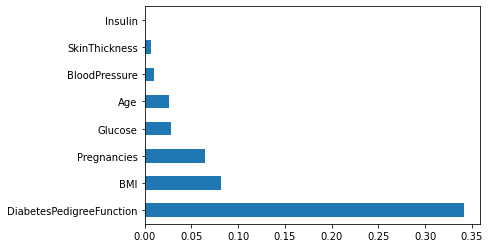

In [30]:
pd.Series(abs(svm_diabetes.coef_[0]), index=X_train_diabetes.columns).nlargest(10).plot(kind='barh')

In [31]:
svm_feature_imp = abs(svm_diabetes.coef_[0])

### 2. KNN

In [32]:
neighbors = np.arange(1,18)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
   
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train_diabetes, Y_train_diabetes)
    train_accuracy[i] = knn.score(X_train_diabetes, Y_train_diabetes)
    test_accuracy[i] = knn.score(X_test_diabetes, Y_test_diabetes) 

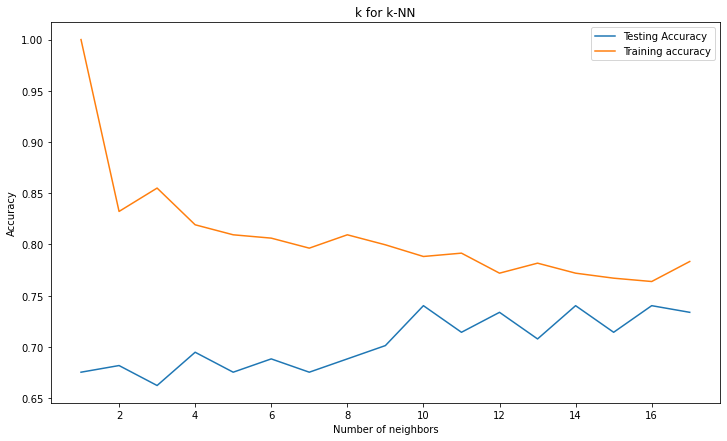

In [33]:
plt.figure(figsize=(12,7))
plt.title('k for k-NN')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')

plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Observation: We can observe above that we get maximum testing accuracy for k=12

In [34]:
knn_t_start = time.time() 

# Create KNN Classifier
knn_diabetes = KNeighborsClassifier(n_neighbors=14)

knn_diabetes.fit(X_train_diabetes, Y_train_diabetes)

knn_y_pred_diabetes = knn_diabetes.predict(X_test_diabetes)

print(f'Training took (s): {time.time()-knn_t_start}')

Training took (s): 0.0061168670654296875


In [35]:
# Model Accuracy: how often is the classifier correct?
knn_accuracy = metrics.accuracy_score(Y_test_diabetes, knn_y_pred_diabetes)
print("Accuracy:",knn_accuracy)

# Model Precision: what percentage of positive tuples are labeled as such?
knn_precision = metrics.precision_score(Y_test_diabetes, knn_y_pred_diabetes)
print("Precision:",knn_precision)

# Model Recall: what percentage of positive tuples are labelled as such?
knn_recall = metrics.recall_score(Y_test_diabetes, knn_y_pred_diabetes)
print("Recall:",knn_recall)

Accuracy: 0.7402597402597403
Precision: 0.6530612244897959
Recall: 0.5818181818181818


In [36]:
#Apply k-fold validation here
knn_cv_diabetes = cross_val_score(knn_diabetes,X_train_diabetes,Y_train_diabetes,cv=5)

knn_cv_mean = np.mean(knn_cv_diabetes)
print(knn_cv_diabetes)
print('knn_cv_scores mean:{}'.format(knn_cv_mean))

[0.70731707 0.7398374  0.74796748 0.73170732 0.7704918 ]
knn_cv_scores mean:0.7394642143142743


#### GridSearchCV

In [37]:
param_grid_knn = [
  {'n_neighbors': [10,12,14], 'weights': ['uniform','distance'], 'metric': ['euclidean','manhattan']},
 ]

In [38]:
grid_knn=GridSearchCV(knn_diabetes,param_grid=param_grid_knn, cv=10, n_jobs=-1)
grid_knn.fit(X_train_diabetes,Y_train_diabetes)
y_pred=grid.predict(X_test_diabetes)

In [39]:
grid_knn.best_score_

0.7541776837652037

In [40]:
grid_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 14, 'weights': 'distance'}

### Feature Importance

In [41]:
results = permutation_importance(knn_diabetes, X_train_diabetes, Y_train_diabetes, scoring='accuracy')
knn_feature_imp = results.importances_mean

In [42]:
knn_feature_imp

array([-0.00325733,  0.12931596,  0.00130293, -0.00065147,  0.03452769,
        0.        , -0.0009772 ,  0.01498371])

<AxesSubplot:>

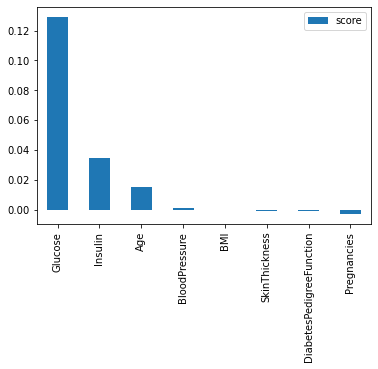

In [43]:
index = np.array(X_train_diabetes.columns)
df_knn_imp_features = pd.DataFrame({'score':np.array(knn_feature_imp), 'features':np.array(X_train_diabetes.columns)}, index=index)

df_knn_imp_features.sort_values(by="score", ascending = False).plot.bar(rot=90)


#### AUC

In [45]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test_diabetes, knn_y_pred_diabetes)
knn_auc = metrics.auc(fpr, tpr)

### 3. Random Forests

In [46]:
# Instantiating random forest classifier

clf = RandomForestClassifier(oob_score = True,n_jobs = -1,random_state = 100)
clf

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=100)

In [47]:
# Creating Predictor Matrix
X = df_diabetes.drop('Outcome',axis = 1)

# Target variable
y = df_diabetes['Outcome']

In [48]:
# Splitting the matrices into random train & test subsets where test data contains 25% data and rest considered as training data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 200)

In [49]:
# Performing K-fold cross validation with 5 folds 

scores = cross_val_score(clf,X_train,y_train,cv = 5,scoring = "f1_macro")
scores.mean()

0.7024475166032504

In [50]:
# Building a forest of trees from training set
knn_t_start = time.time() 
clf.fit(X_train,y_train)
print(f'Training took (s): {time.time()-knn_t_start}')

Training took (s): 0.1628561019897461


In [51]:
#Predicting on classifier created

train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [52]:
# Finding F1 score of training and testing sets 

print("The training F1 score is: ",f1_score(train_pred,y_train))
print("The testing F1 score is :",f1_score(test_pred,y_test))

The training F1 score is:  1.0
The testing F1 score is : 0.68


#### Model is overfitting as testing F1 score is lower than training. Hyperparameter tuning needs to be done and looking for high F1 score that is why scorer variable is defined.

In [53]:
#  Tuning hyperparameters

parameters = {
             "max_depth":[2,3,4],
             "n_estimators":[100,104,106],
             "min_samples_split":[3,4,5],
             "min_samples_leaf":[4,8,9]
             }


In [54]:
scorer = make_scorer(f1_score)

In [55]:
# Using Randomized Search CV to find best optimal hyperparameter that best describe a classifier

clf1 = RandomizedSearchCV(clf,parameters,scoring = scorer)

# Fitting the model

clf1.fit(X_train,y_train)

# Getting best estimator having high score

best_clf_random = clf1.best_estimator_
best_clf_random


RandomForestClassifier(max_depth=4, min_samples_leaf=8, min_samples_split=3,
                       n_jobs=-1, oob_score=True, random_state=100)

In [56]:
# Again, finding cross validation score

scores = cross_val_score(best_clf_random,X_train,y_train,cv = 5,scoring = "f1_macro")
rf_cv_mean = scores.mean()

As you can see cross validation score has decreased as compared to earlier score. It should increase and for that you have to try changing hyperparameter values so that better cross validation score can be achieved.

In [57]:
# Fitting the best estimator

best_clf_random.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=8, min_samples_split=3,
                       n_jobs=-1, oob_score=True, random_state=100)

In [58]:
# Getting first estimator

best_clf_random.estimators_[0]

DecisionTreeClassifier(max_depth=4, max_features='auto', min_samples_leaf=8,
                       min_samples_split=3, random_state=186422792)

In [59]:
# Predicting on best estimator

train_pred = best_clf_random.predict(X_train)
test_pred = best_clf_random.predict(X_test)

In [60]:
# Finding the F1 score of training & testing sets

print("The training F1 score is: ",f1_score(train_pred,y_train))
print("The testing F1 score is :",f1_score(test_pred,y_test))

The training F1 score is:  0.6770833333333333
The testing F1 score is : 0.6436781609195402


No the testing F1 score is higher than training score. 

In [61]:
# Getting accuracy score 

rf_accuracy = accuracy_score(y_test,test_pred)

In [62]:
# Computing ROC AUC from prediction scores

rf_auc = roc_auc_score(y_test,best_clf_random.predict_proba(X_test)[:,1])

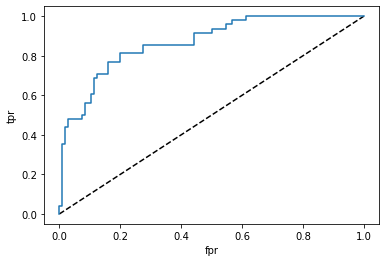

In [63]:
# Plotting ROC curve

fpr,tpr,thresholds = roc_curve(y_test,best_clf_random.predict_proba(X_test)[:,1])

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [64]:
# Computing confusion matrix

pd.crosstab(y_test,test_pred,rownames = ['True'],colnames = ['Predicted'],margins = True)

Predicted,0,1,All
True,,,
0,95,11,106
1,20,28,48
All,115,39,154


Text(33.0, 0.5, 'Actual Label')

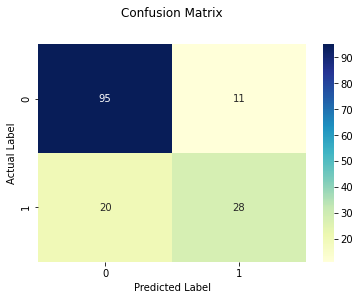

In [65]:
# Plotting confusion matrix
cnf_matrix = confusion_matrix(y_test,test_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix),annot = True,cmap = "YlGnBu",fmt = 'g')
plt.title("Confusion Matrix",y = 1.1)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [66]:
# Computing the precision

rf_precision = precision_score(y_test,test_pred)

In [67]:
# Computing the recall

rf_recall = recall_score(y_test,test_pred)

<AxesSubplot:>

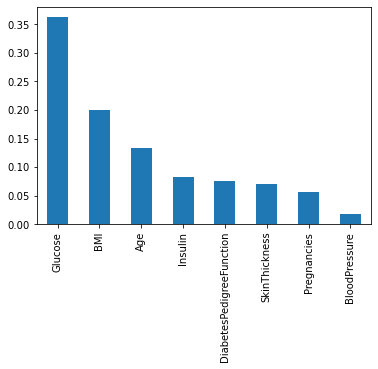

In [68]:
# Getting feature importances
rf_features = pd.Series(best_clf_random.feature_importances_,index = X.columns)
rf_features.sort_values(ascending = False)
# Plotting feature importances 
rf_features.sort_values(ascending = False).plot(kind = "bar")

In [69]:
svm_f1 = 2 * (svm_precision * svm_recall) / (svm_precision + svm_recall)
knn_f1 = 2 * (knn_precision * knn_recall) / (knn_precision + knn_recall)
rf_f1 = 2 * (rf_precision * rf_recall) / (rf_precision + rf_recall)

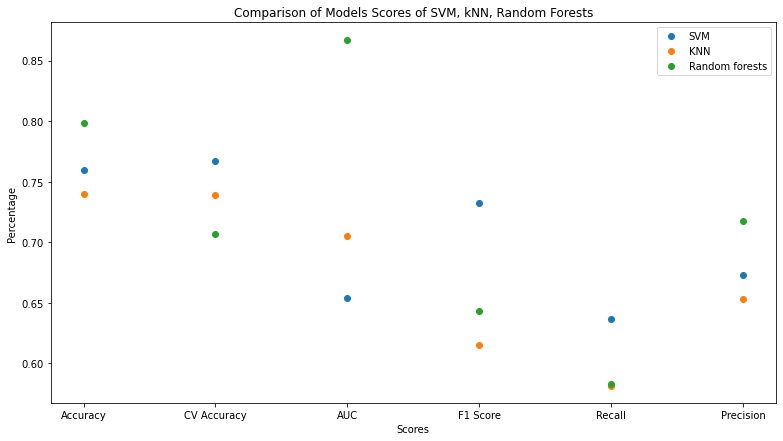

In [83]:
plt.figure(figsize=(13,7))
score_name= ['Accuracy','CV Accuracy', 'AUC', 'F1 Score', 'Recall', 'Precision'] 
plt.plot(score_name, [svm_accuracy,svm_cv_mean,svm_f1,svm_auc,svm_recall,svm_precision], 'o', label='SVM')
plt.plot(score_name, [knn_accuracy,knn_cv_mean,knn_auc,knn_f1,knn_recall,knn_precision], 'o', label='KNN')
plt.plot(score_name, [rf_accuracy, rf_cv_mean, rf_auc, rf_f1, rf_recall, rf_precision], 'o', label='Random forests')
plt.legend()
plt.xlabel('Scores')
plt.ylabel('Percentage')
plt.title('Comparison of Models Scores of SVM, kNN, Random Forests')
plt.show()

### Feature importances Comparison

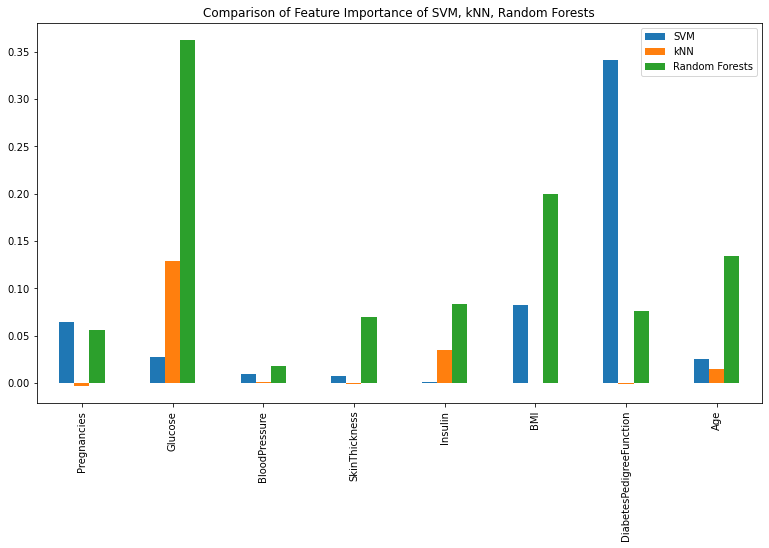

In [73]:
svm = svm_feature_imp
knn = knn_feature_imp

random_forests = best_clf_random.feature_importances_
index = np.array(X_train_diabetes.columns)
df = pd.DataFrame({'SVM': svm, 'kNN': knn, 'Random Forests': random_forests}, index=index)
ax = df.plot.bar(figsize=(13,7),rot=90, title='Comparison of Feature Importance of SVM, kNN, Random Forests')
